<a href="https://colab.research.google.com/github/ffranciscocasas/DataScience/blob/main/Casas_SegundaPreEntrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset de Churn**




In [ ]:
''' A continuacion voy a importar las principales librerias que vamos a utlizar para hacer esta analisis: numpy y panda.
Luego voy a conectarme a kaggle para traerme mi dataset
'''
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline


#Instalar la libreria de Kaggle
! pip install kaggle
! pip install scikit-learn

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']= '/content'

In [ ]:
#Cambiando los permisos para read/write solo el ownermanishabhatt22/marketing-campaign-performance-dataset
! chmod 600 /content/kaggle.json
! kaggle datasets download blastchar/telco-customer-churn

telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Para hacer el unzip
! unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
replace WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **Abstract**
**Usuario Potencial:** El siguiente dataset tiene el objetivo de analizar la retención de clientes en el ámbito de los servicios de telecomunicaciones (Telco). Es importante analizar la satisfacción al cliente, por parte analistas de datos, así como para gerentes, interesados en mejorar la lealtad y reducir la tasa de abandono de clientes (Churn). Además, resulta ser una herramienta para la implementación de estrategias efectivas de retención que combaten la caida de los clientes.

**Problema comercial:** El propósito de este análisis es utilizar los datos disponibles para generar visualizaciones e insights que aborden las siguientes cuestiones críticas:

¿Existe un periodo específico durante el cual los clientes tienden a abandonar

1.  ¿Existe un periodo específico durante el cual los clientes tienden a abandonar más?
2. ¿Cómo afectan las características demográficas de los clientes a la lealtad?
3. ¿Hay diferencias en la retención basadas en el tipo de contrato o las opciones de pago?
4. ¿Influye la duración de la permanencia del cliente en su probabilidad de churn?
5. ¿Se correlaciona el uso de servicios adicionales con una menor tasa de churn?
6. ¿Qué papel juega la ubicación del cliente en su decisión de continuar con el servicio?

A su vez de crear un modelo que nos ayude a predecir quien es mas probable de dar de baja nuestro servicio.

**Contexto Comercial:**
*Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.*

Este dataset es esencial para comprender los factores que contribuyen a la retención de clientes en el sector de las telecomunicaciones. Proporciona a las empresas información crítica para evaluar la efectividad de sus programas de fidelización, identificar áreas de riesgo y oportunidad, y adaptar sus ofertas de servicios para satisfacer mejor las necesidades y preferencias de los clientes. La capacidad de analizar estas dinámicas es clave para mantener una base de clientes sólida y para la planificación estratégica de la empresa.

**Contexto Analitico:**
*Each row represents a customer, each column contains customer’s attributes described on the column Metadata.*

Desde una perspectiva analítica, este dataset es un compendio de información que permite realizar un análisis exhaustivo del comportamiento del cliente. Los analistas pueden realizar estudios descriptivos para profundizar en los factores que influyen en la fidelidad del cliente y explorar análisis comparativos para discernir entre los diferentes perfiles de clientes y sus tasas de retención. El uso de modelos predictivos puede facilitar la proyección de tendencias de churn y ayudar a prevenir la pérdida de clientes anticipadamente. Las variables clave para investigar en este conjunto de datos incluyen:

* Customers who left within the last month: the column is called **Churn**
* Services that each customer has signed up for:
  * **Phone Service:** tienen plan telefonico o no
  * **MultipleLines:** tienen multiples planes (Si), uno solo (No) o no tiene plan (Other)
  * **Internet Service** Tipo de proveedor de internet, DSL, Fibra Optica, o no tiene
  * **Online Security:** El cliente tiene seguridad o no (Si, No, No tiene servicio de internet)
  * online backup
  * device protection
  * tech support
  * Streaming TV and movies
* Customer account information:
  * **Tenure:** numero de meses que en un cliente esta en la empresa
  * contract
  * payment method
  * paperless billing
  * monthly charges
  * total charges
* Demographic info about customers:
  * **Gender:** si es mujer o hombre
  * **Senior Citizen:** es mayor o no
  * **Partner:** tiene pareja o no
  * **Dependants:** tienen dependientes o no

Estas variables proporcionan una mirada detallada a las interacciones entre el cliente y la empresa, y son esenciales para fortalecer la toma de decisiones y la optimización de estrategias para mejorar la retención de clientes.

Podemos observar que tiene 7043 filas únicas de datos y 21 columnas

In [ ]:
#Para ya abrir el dataset ya unzipeado
csv1 = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
csv1.shape
csv1.columns
csv2 = pd.read_excel('/content/Telco_customer_churn_location.xlsx')
#Hay un problema ante de hacer merge en csv se llama CustomerID, no customerID
csv2.rename(columns={'Customer ID': 'customerID'}, inplace=True)
print(csv1.columns)
print(csv2.columns)
#Haciendo merge de las dos datasets con CustomerID igual
df = pd.merge(csv1, csv2, on='customerID', how='left')
#Podemos observar que tiene 7043 filas únicas de datos y 21 columnas
#Obtuvimos con describe la cantidad de datos, la media, la std, el min, max y los quartiles


#Se observa que la mayoria son objects y no datos numericos
df.dtypes
df.head
df.describe()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['customerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude'],
      dtype='object')


,SeniorCitizen,tenure,MonthlyCharges,Count,Zip Code,Latitude,Longitude
count,7043.000000,7043.000000,7043.000000,7043.0,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,1.0,93486.070567,36.197455,-119.756684
std,0.368612,24.559481,30.090047,0.0,1856.767505,2.468929,2.154425
min,0.000000,0.000000,18.250000,1.0,90001.000000,32.555828,-124.301372
25%,0.000000,9.000000,35.500000,1.0,92101.000000,33.990646,-121.788090
50%,0.000000,29.000000,70.350000,1.0,93518.000000,36.205465,-119.595293
75%,0.000000,55.000000,89.850000,1.0,95329.000000,38.161321,-117.969795
max,1.000000,72.000000,118.750000,1.0,96150.000000,41.962127,-114.192901


Podemos observar que no hay valores nulos

In [ ]:
#Checkear la presencia de valores null para cada columna de df
null_counts = df.isnull().sum()
print(null_counts)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Count               0
Country             0
State               0
City                0
Zip Code            0
Lat Long            0
Latitude            0
Longitude           0
dtype: int64


# **UnZip API**
En nuestro análisis, comenzamos con un dataset sobre el churn de clientes, que nos proporcionaba información valiosa sobre quiénes se iban y quiénes se quedaban. A partir de esta base de datos, decidi incorparar los datos de ubicación a partir de un archivo Excel de IBM. Esto me permitio conectar cada cliente con su lugar de residencia.

Después, para añadir detalles demograficos sobre el entorno de cada cliente, utilizamos la API uszipcode. Esto nos permitió agregar información como la población, el ingreso medio del hogar y las unidades de vivienda de cada código postal. Con estos datos, empezamos a ver patrones que antes no eran visibles. Por ejemplo, pudimos observar cómo el ingreso medio afectaba la lealtad de los clientes o cómo la densidad de viviendas se relacionaba con el churn.

In [ ]:
!pip install uszipcode

In [ ]:
# Import the necessary libraries
import pandas as pd
from uszipcode import SearchEngine

# Load your existing merged dataset
df
# Create a SearchEngine instance
search = SearchEngine()

# Add new columns to 'df' initialized with NaN
# These columns will be filled with the ZIP code information
df['Population'] = pd.NA
df['Median Household Income'] = pd.NA
df['Housing Units'] = pd.NA
# Add more columns as needed

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    # Get the ZIP code information
    zipcode_info = search.by_zipcode(row['Zip Code']).to_dict()

    # Update the new columns with the ZIP code information
    df.at[index, 'Population'] = zipcode_info['population']
    df.at[index, 'Median Household Income'] = zipcode_info['median_household_income']
    df.at[index, 'Housing Units'] = zipcode_info['housing_units']
    # Update more fields as needed

# Now 'df' has been enriched with ZIP code information, save it as 'df_enriched'
df_enriched = df
print (df_enriched)


Exception ignored in: <function SearchEngine.__del__ at 0x7d3f0c8fe3b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1816, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1858, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 926, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2426, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2649, in _do_close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2635, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2627, in _connection_rollback_impl
  File

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

En el análisis, identifique que la columna 'TotalCharges' debería ser numérica, ya que es un valor monetario, pero inicialmente estaba en formato de texto (objeto). De esta manera, converti la columna a un formato numérico. Durante este proceso, si alguna cadena de texto no se podía convertir a número, la instrucción 'coerce' generaría un valor nulo en su lugar.

Cuando revisé los datos después de convertir la columna 'TotalCharges' a numérica, encontré once valores nulos. Estos provenían de cadenas de texto vacías o caracteres no numéricos en la columna original. Todos estos nulos le puse la mediana de 'TotalCharges',

In [ ]:
#TotalCharges tiene que ser numerico, pero aparece como objeto
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
#Checkear si hay nulos aca
missing_total_charges = df['TotalCharges'].isnull().sum()
missing_total_charges
#Encontramos once nulos aca, corresponden a los strings que encontramos antes
#Podemos llenar estos nulos con la media de TotalCharges
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Ahora verificamos si quedo algun valor nulo en la columna TotalCharges
missing_total_charges_final = df['TotalCharges'].isnull().sum()

missing_total_charges_final

0

# **Análisis exploratorio de datos (EDA)**

El primer grafico podemos es que la mayoría de los clientes no cancelaron su servicio en el último mes

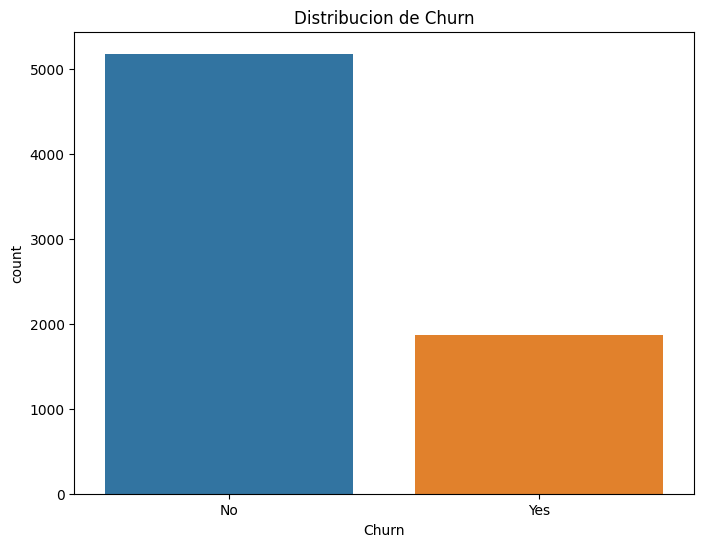

In [ ]:
#Grafico de distribucion de Churn
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Churn')
plt.title('Distribucion de Churn')
plt.show()

#La mayoria de las personas no da de baja el servicio el ultimo mes

En la siguiente matrix, podemos hallar algunos insights relevantes:

**Geografía y Ubicación:** Existe una correlación muy alta entre la latitud y el código postal (0.89), así como entre la longitud y la latitud (-0.89), Esto era esperable porque son variables que se relacion intrinsicamente entre si.

**Fidelidad y Cargos:** La 'antigüedad' (tenure) de los clientes y los 'TotalCharges' tienen una correlación significativa de 0.83. Esto podría indicar que cuanto más tiempo un cliente ha estado con la empresa, más ha pagado en total, lo cual es lógico si consideramos que los cargos totales aumentarían con el tiempo.

**Cargos Mensuales y Totales:** Los 'MonthlyCharges' y 'TotalCharges' tienen una correlación positiva de 0.65, lo que sugiere que los clientes con cargos mensuales más altos tienden a acumular más cargos totales a lo largo del tiempo.

**Relaciones Menos Fuertes:** La correlación entre 'tenure' y 'MonthlyCharges' (0.25) y entre 'SeniorCitizen' y 'MonthlyCharges' (0.22) son menos fuertes, pero aún sugieren que hay una relación positiva entre estos factores. Por ejemplo, es posible que los clientes mayores o con más tiempo en la empresa tiendan a tener planes más caros o que agreguen más servicios con el tiempo (Ecosistema).

**Correlaciones Débiles:** Las correlaciones entre 'SeniorCitizen' y 'TotalCharges' (0.10), y entre las coordenadas geográficas ('Latitude', 'Longitude') y 'MonthlyCharges' son muy débiles, lo que implica que estos factores no están directamente relacionados o que la relación es mínima.

<ipython-input-19-ec07670e8ac8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


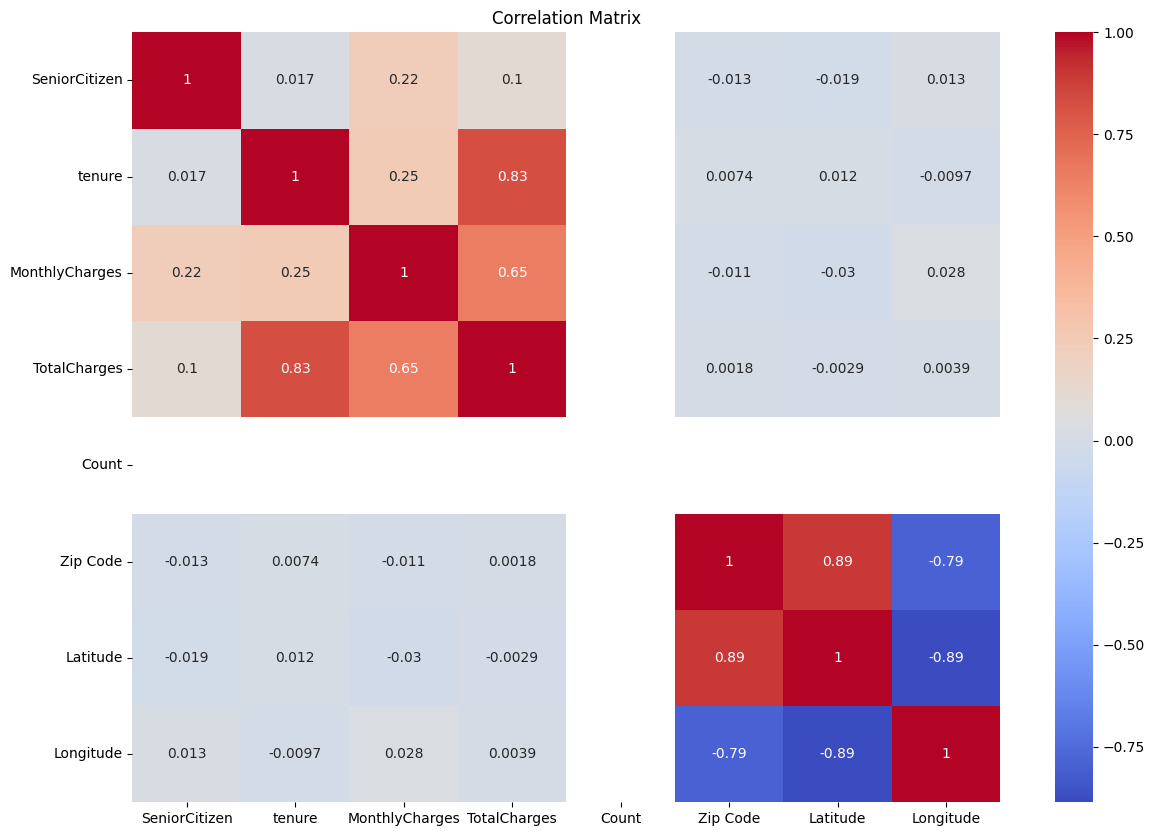

Highest correlation: Latitude and Zip Code, correlation value: 0.89
Highest correlation: Longitude and Latitude, correlation value: -0.89
Highest correlation: tenure and TotalCharges, correlation value: 0.83
Highest correlation: Longitude and Zip Code, correlation value: -0.79
Highest correlation: MonthlyCharges and TotalCharges, correlation value: 0.65
Highest correlation: tenure and MonthlyCharges, correlation value: 0.25
Highest correlation: SeniorCitizen and MonthlyCharges, correlation value: 0.22
Highest correlation: SeniorCitizen and TotalCharges, correlation value: 0.10
Highest correlation: Latitude and MonthlyCharges, correlation value: -0.03
Highest correlation: Longitude and MonthlyCharges, correlation value: 0.03


In [ ]:
#1. Heatmap - Correlation (1.Seaborn)
corr_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#Encontrar los 10 indices con el nivel mas alto de correlacion
max_correlation_indices = corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().index[:11]

# Imprimir las relaciones con el mayor nivel de correlacion (excluir correlaciones que sean entre misma variables)
for index in max_correlation_indices:
    var1, var2 = index
    correlation = corr_matrix.loc[var1, var2]

    # Excluir correlacion a si misma
    if var1 != var2:
        print(f"Highest correlation: {var1} and {var2}, correlation value: {correlation:.2f}")

**Tenure:**
El histograma muestra un pico significativo en el extremo izquierdo, lo que sugiere que una gran cantidad de clientes tienen una antigüedad baja con la compañía. Esto podría indicar que los clientes abandonen el servicio después de poco tiempo.

**MonthlyCharges:** Se puede observar que hay una gran concentracion de clientes con los planes mas bajos.

**TotalCharges:** Podemos ver dos opciones: hay muchos clientes nuevos o que los clientes no suelen tomar servicios elevados por eso no acumulan altos cargos a lo largo del tiempo.

**Zip Code (Código Postal):**
El histograma de 'Zip Code' muestra una distribución con múltiples picos, lo que sugiere una concentración de clientes en ciertas áreas. Esta distribución podría ayudar a identificar regiones específicas donde la compañía tiene una mayor presencia de mercado.

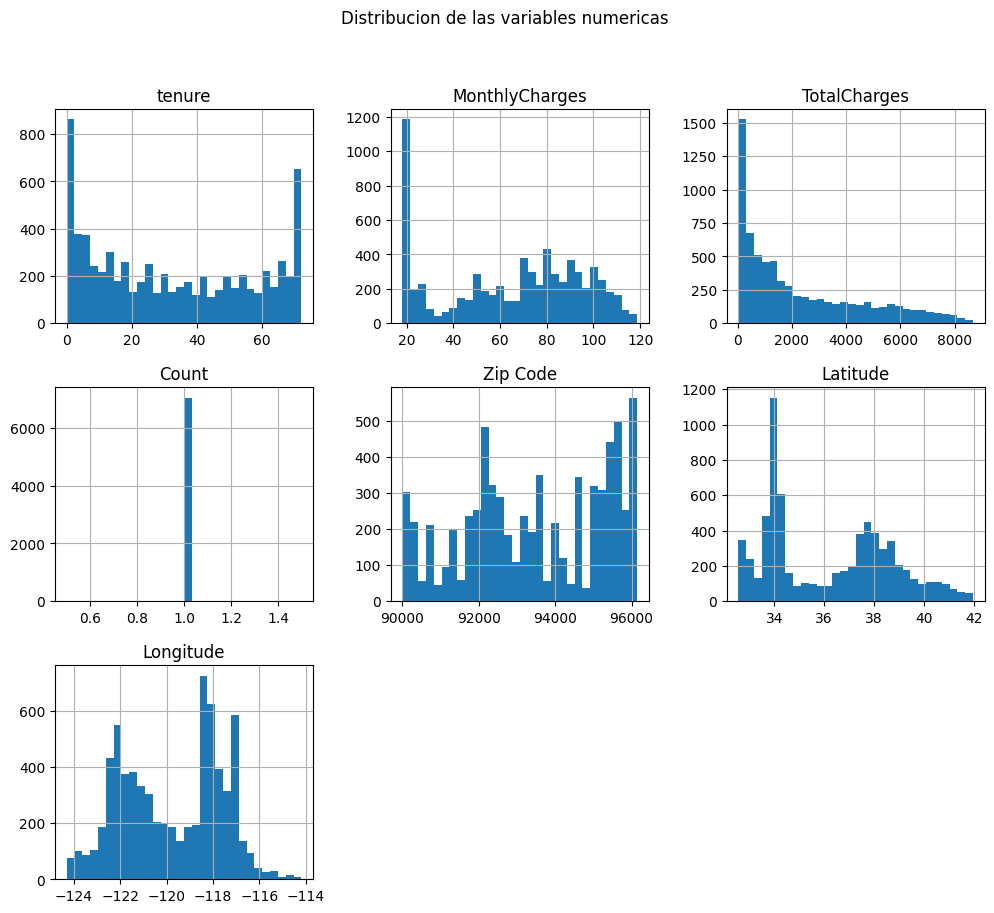

In [ ]:
# Hacer histogramas de las variables numericas
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['SeniorCitizen'])  # Excluir SeniorCitizen porque es binaria
numerical_features.hist(figsize=(12,10), bins=30)
plt.suptitle('Distribucion de las variables numericas')
plt.show()

Insights de los siguientes boxplots:

**Tenure:** Muestra que los clientes que no abandonaron el servicio ('No Churn') tienden a tener una antigüedad mayor en comparación con aquellos que sí abandonaron el servicio ('Churn'). La mediana de antigüedad para los clientes que se quedan es significativamente más alta, lo que sugiere que una mayor duración del servicio está asociada con la retención de clientes. Es decir, mientra mas tiempo pase el cliente es mas fiel y menos probable que dé de baja el servicio.

**MonthlyCharges (Cargos Mensuales):** Se observa que los clientes que se han ido ('Churn') tienden a tener cargos mensuales más altos en comparación con los que se quedan. Esto puede indicar que el precio es un factor en la decisión del cliente de abandonar el servicio.

**TotalCharges (Cargos Totales):** Los clientes que no han abandonado el servicio tienden a tener una gama más amplia y valores más altos en el total acumulado de cargos, lo cual es consistente con tener una antigüedad más larga. Los clientes que abandonaron el servicio parecen hacerlo antes de acumular cargos significativos, como se refleja en los valores más bajos de 'TotalCharges'.

**Zip code:** no hay una diferencia notable en la distribución de los códigos postales entre los clientes que se quedan ('No') y los que se van ('Yes'). La decisión de un cliente de quedarse o irse no parece estar fuertemente influenciada por su ubicación geográfic

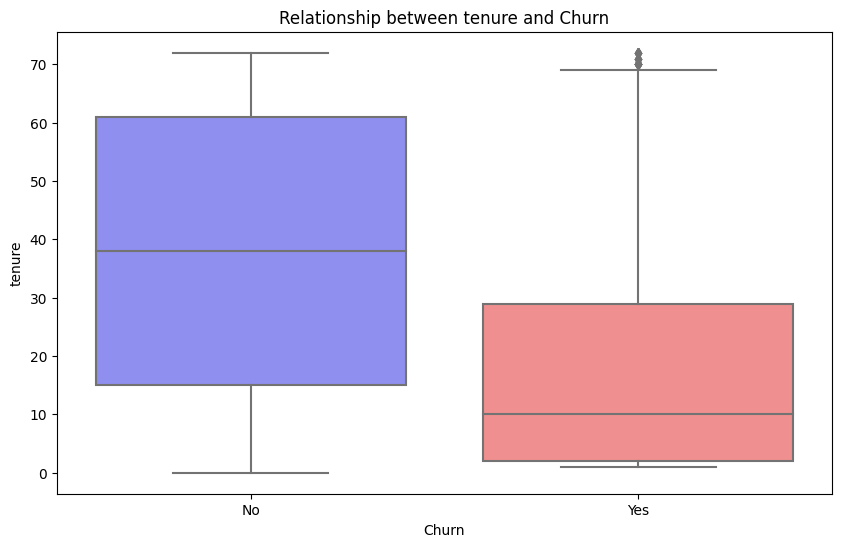

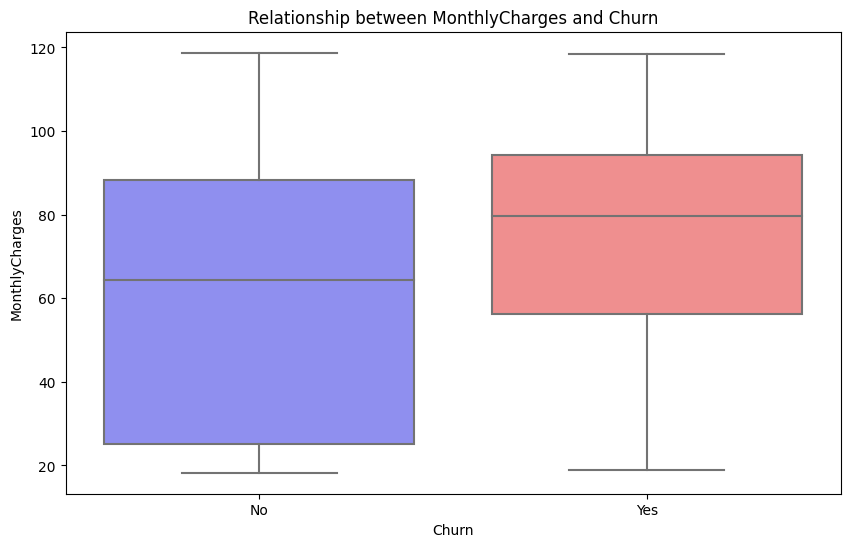

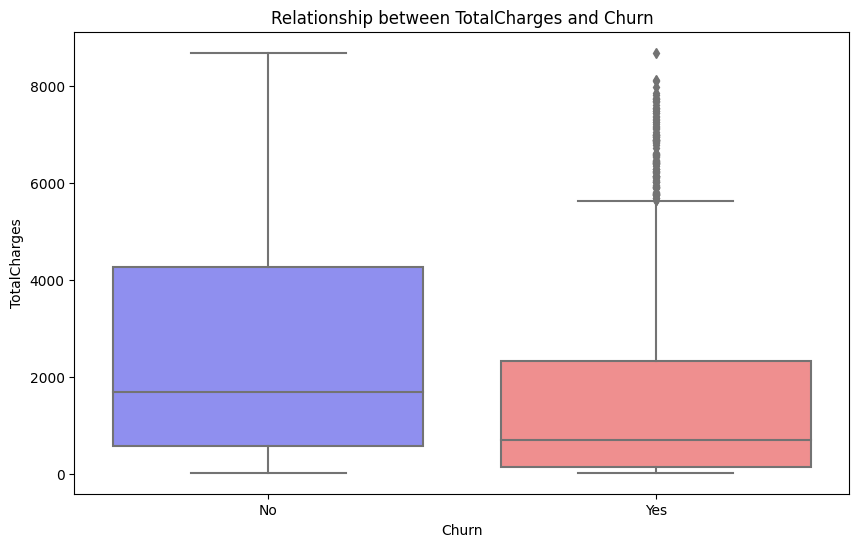

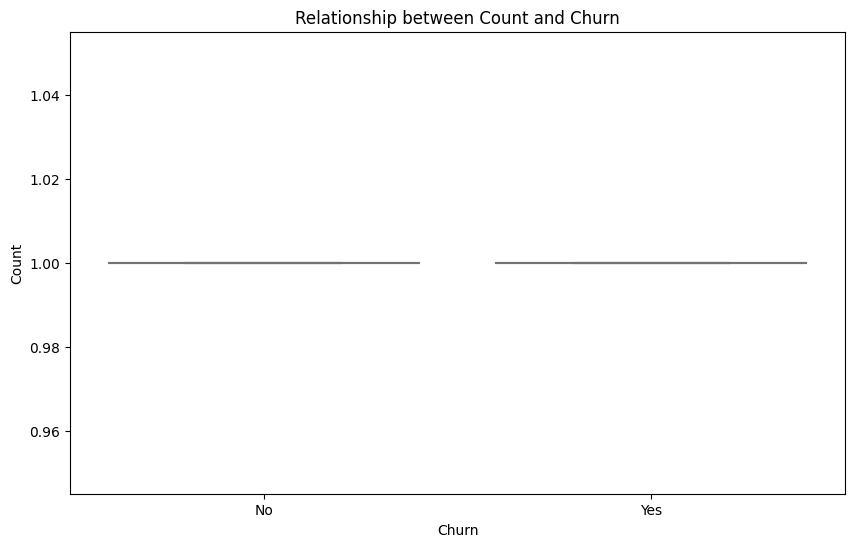

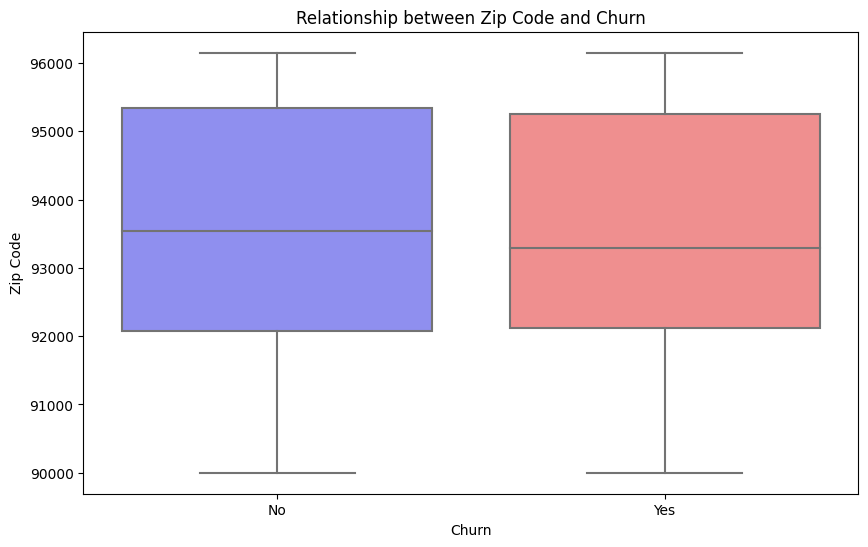

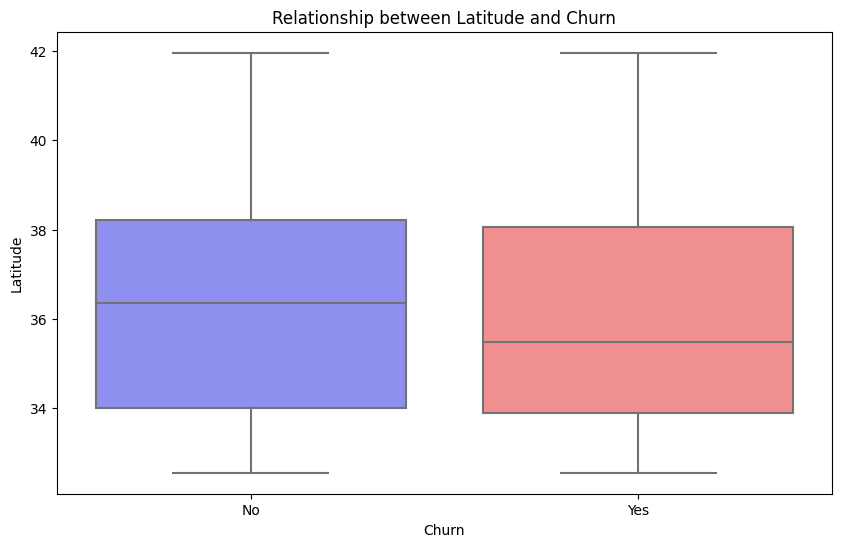

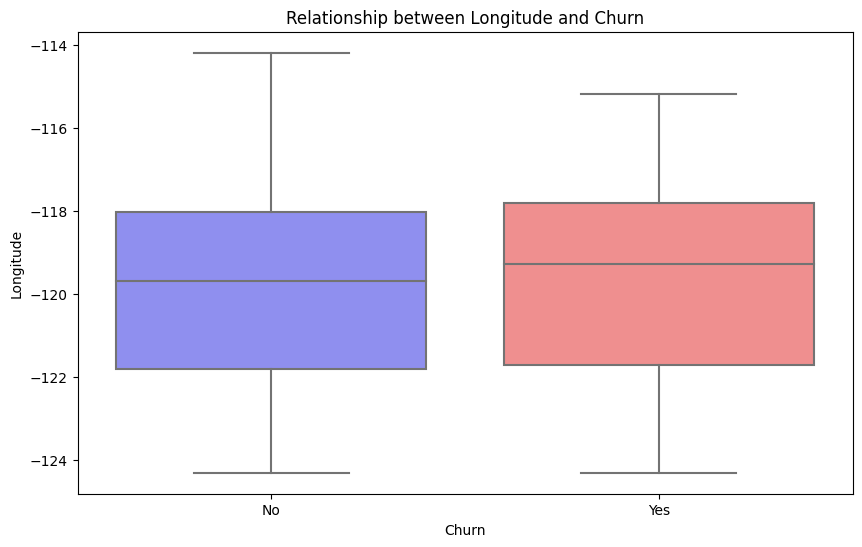

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los colores que deseas utilizar
colors = ['#7F7FFF', '#FF7F7F']

# Crear un bucle para generar los boxplots para cada variable numérica
for feature in numerical_features.columns:
    plt.figure(figsize=(10, 6))

    # Utilizar el método boxplot de seaborn
    sns.boxplot(data=df, x='Churn', y=feature, palette=colors)

    # Personalizar el título del gráfico
    plt.title(f'Relationship between {feature} and Churn')

    # Mostrar el gráfico
    plt.show()


# **Insights**
**Genero:** Ambos géneros tienen tasas similares de retención y abandono.

**Pareja:** Los clientes que tienen pareja presentan una tasa de retención más alta y una tasa de churn más baja en comparación con los que no tienen pareja. Este patrón podría indicar que los clientes en relaciones de pareja pueden tener un estilo de vida más estable o estar más comprometidos con contratos de servicio a largo plazo, lo que reduce la probabilidad de que abandonen el servicio.

**Dependents:** los clientes con hijos prefieren la estabilidad y continuidad, esto puede ser por compromisos familiares o por querer tener los mismo servicios que soporton a un hogar familiar mas grande. Los que no tienen hijos no les molesta el cambio, tienen vidas mas flexibles o abiertos a cambiar proveedores.

**Phone Service:** La mayoría de los clientes que cuentan con el servicio telefónico tienden a permanecer con la empresa, aunque también representa la mayoría de los que se van ('Yes Churn'). Puede ser que el servicio telefonico representa el mayor servicio que ofrece la empresa.

**Multiple Lines:** Los clientes sin multiples lineas presentan una tasa de retención más alta comparada a los que tienen multiples lineas. Sin embargo, es muy similar.

**Internet Service:**  Los clientes con servicio de fibra óptica tienen la tasa de churn más alta. Esto podría implicar que hay problemas relacionados con la satisfacción del cliente o el precio que conducen a una mayor tasa de abandono. Por otro lado, los clientes sin servicio de internet tienen la tasa de churn más baja, lo que sugiere que aquellos que solo utilizan servicios de telefonía pueden ser menos propensos a cambiar de proveedor.

**Online Security:** Los clientes que no tienen servicios de seguridad en línea son más propensos a abandonar que aquellos que sí cuentan con ellos. Interesantemente, los clientes sin ningún servicio de internet tienen tasas de churn más bajas, lo que podría implicar que los servicios adicionales como la seguridad en línea son factores importantes para retener a los clientes que valoran estos servicios.

**Método de pago:** Los clientes que utilizan cheque electrónico como método de pago tienen una tasa de churn más alta en comparación con otros métodos. Esto podría sugerir que los métodos de pago que requieren menos esfuerzo o son más automáticos, como transferencias bancarias y pagos con tarjeta de crédito, podrían estar asociados con una mayor retención de clientes. Los procesos de pago que son más manuales y potencialmente más problemáticos.

**Tipo de contrato:** los clientes con contratos mensuales son más propensos en darse de baja que los que tienen contratos de uno o dos años. Los contratos a más largo plazo permiten retener a los clientes, el compromiso a largo plazo reduce que se bajen los clientes.



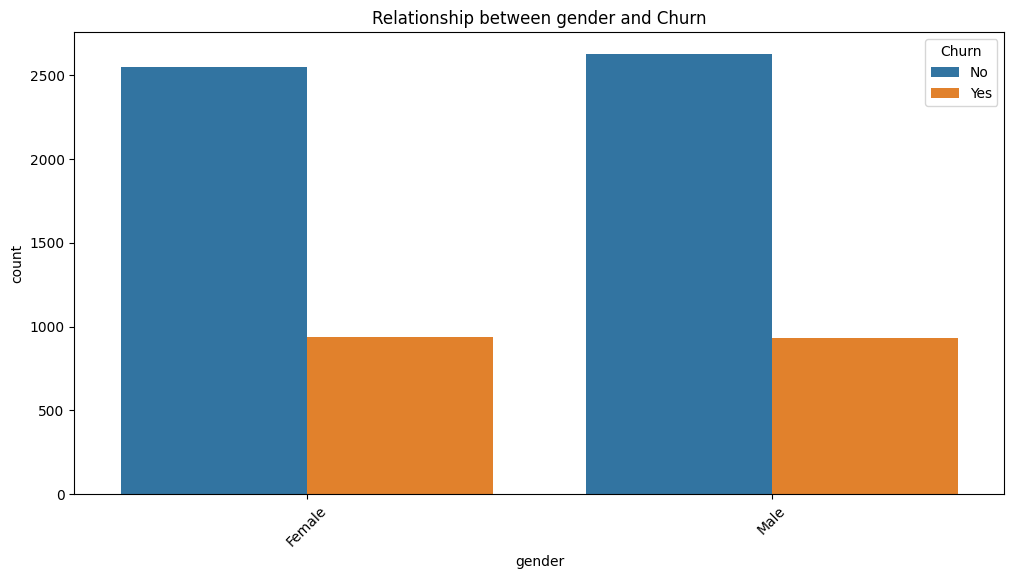

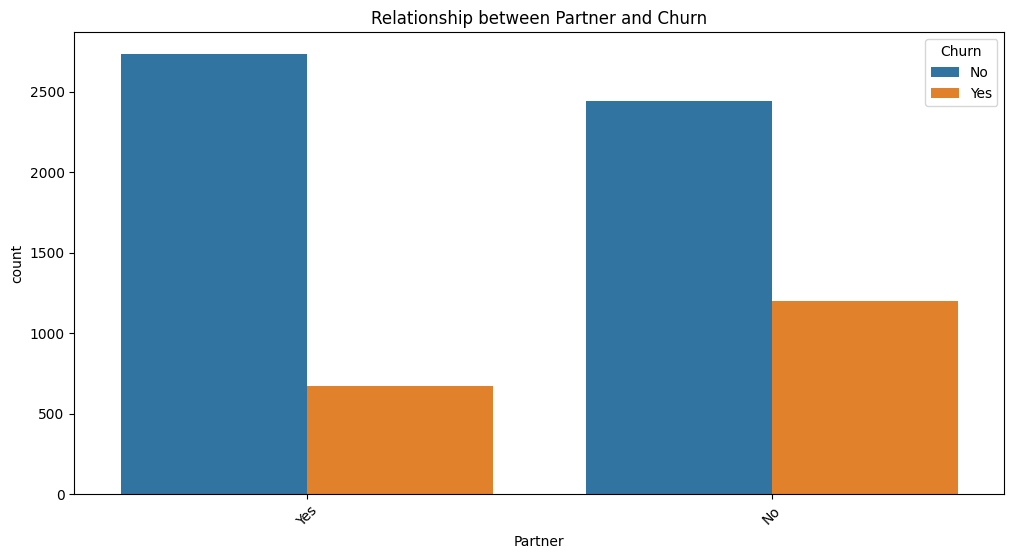

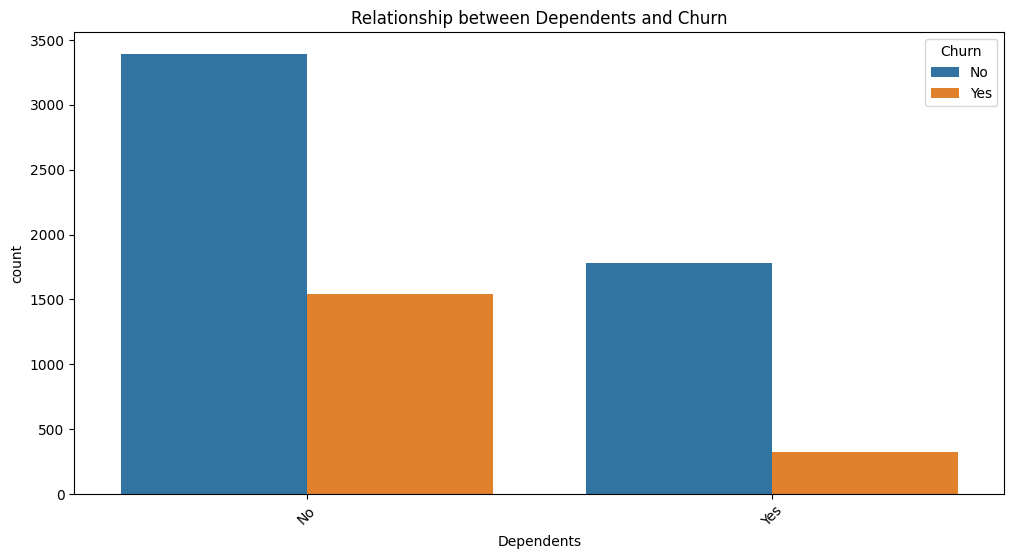

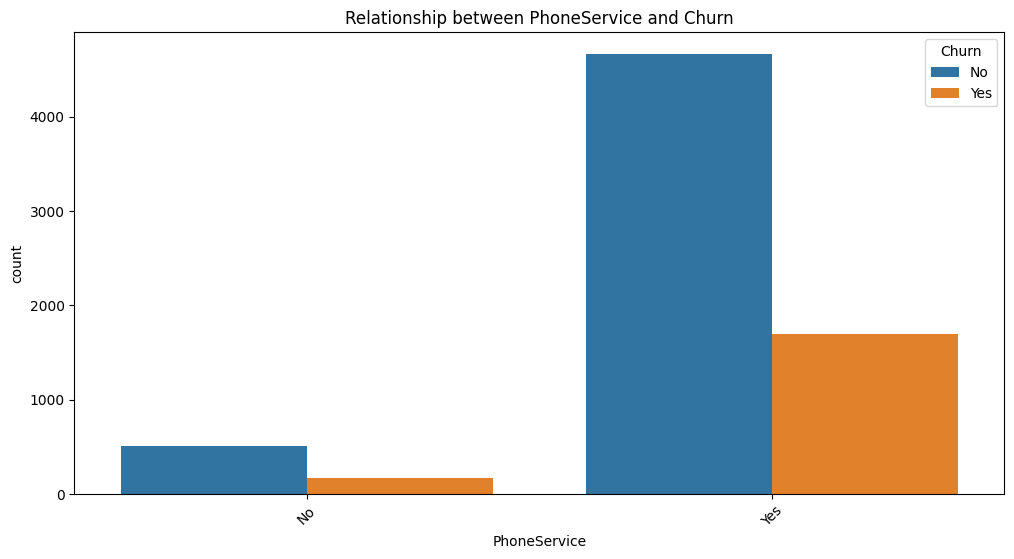

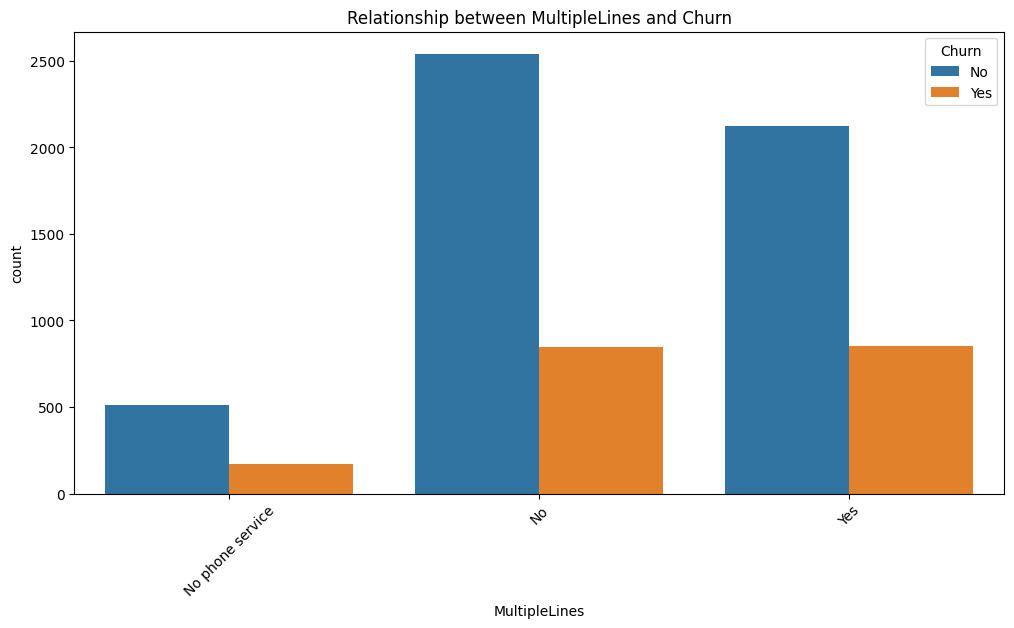

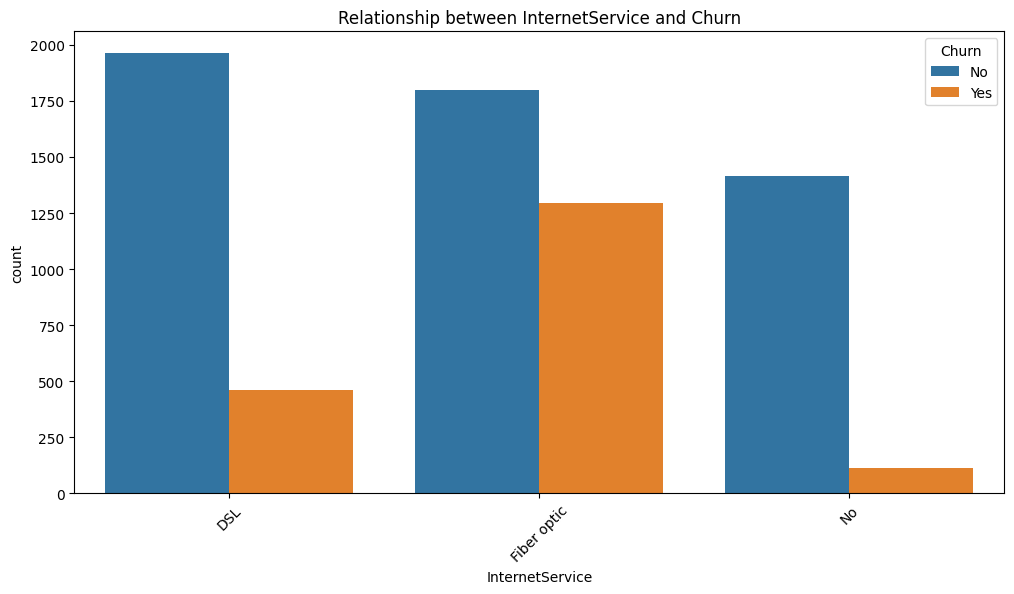

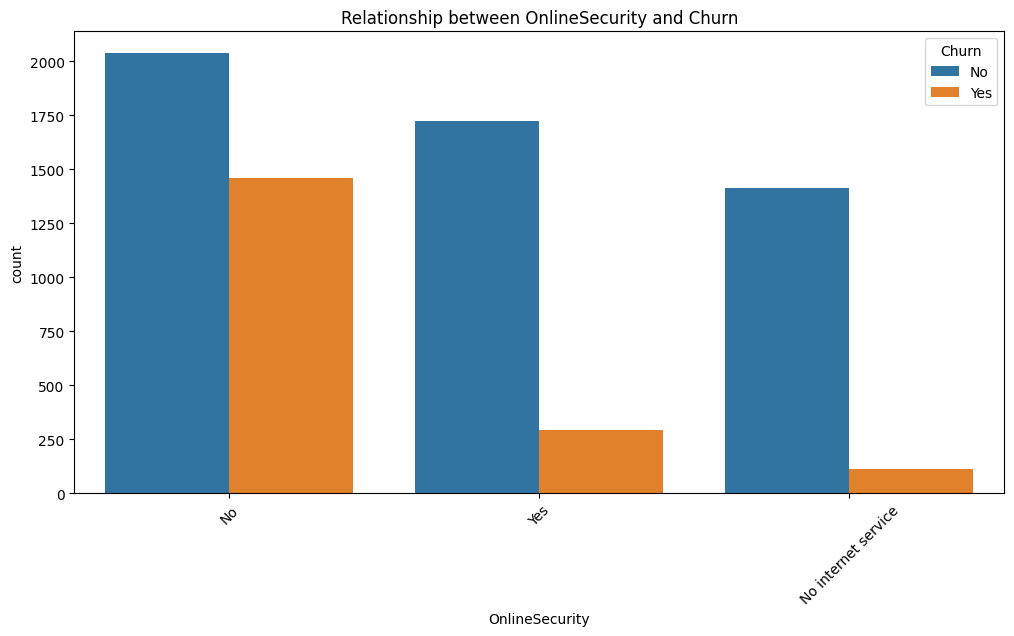

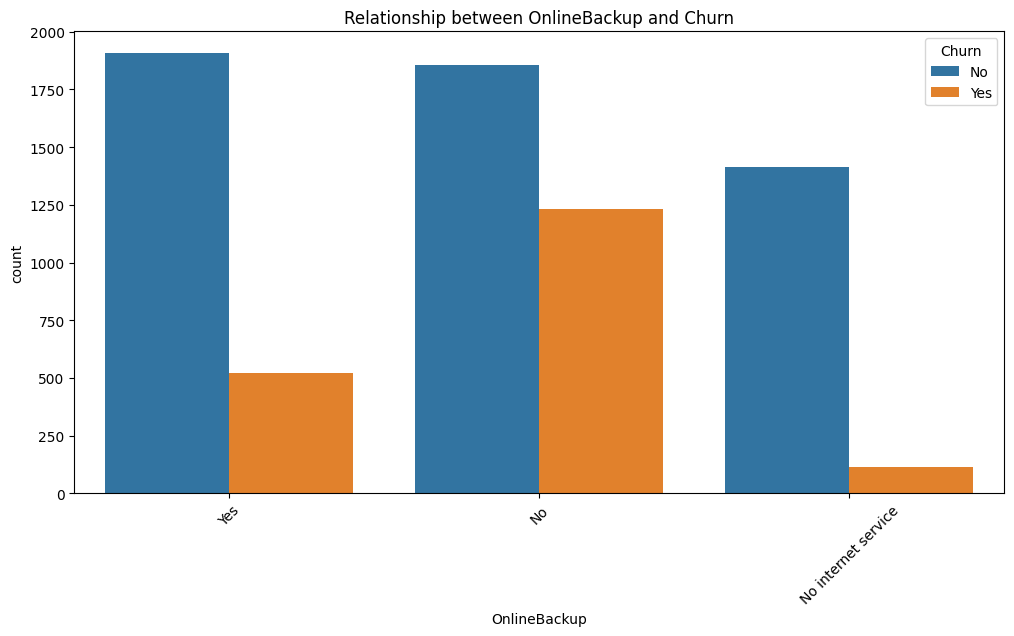

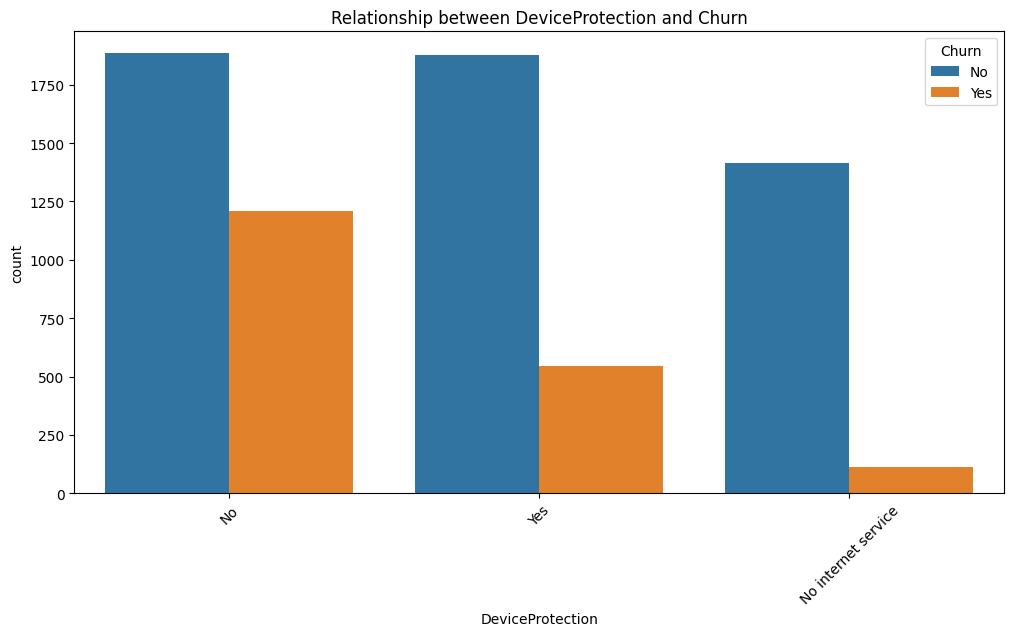

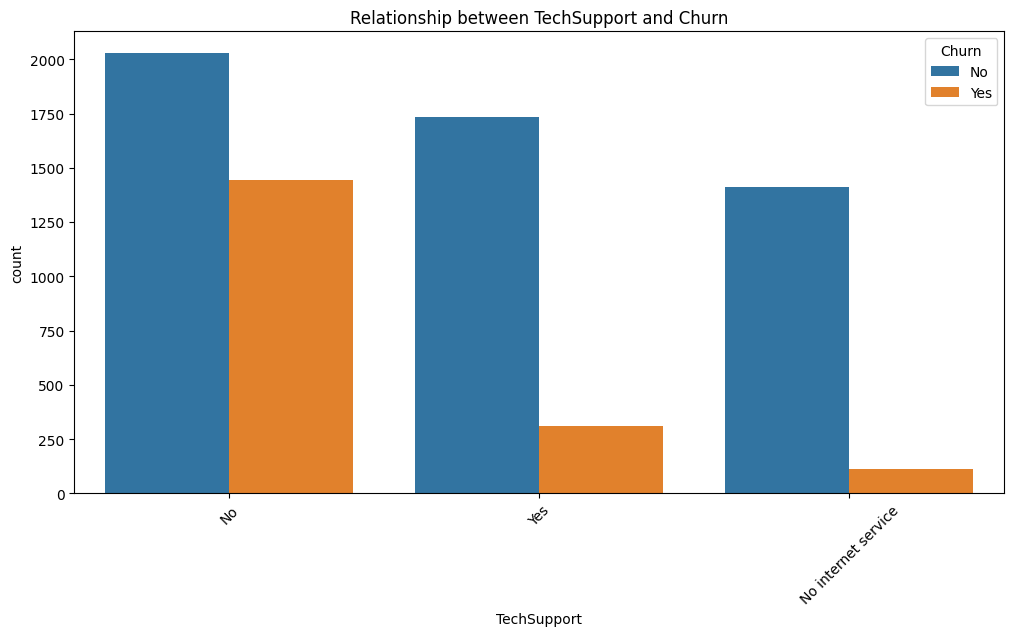

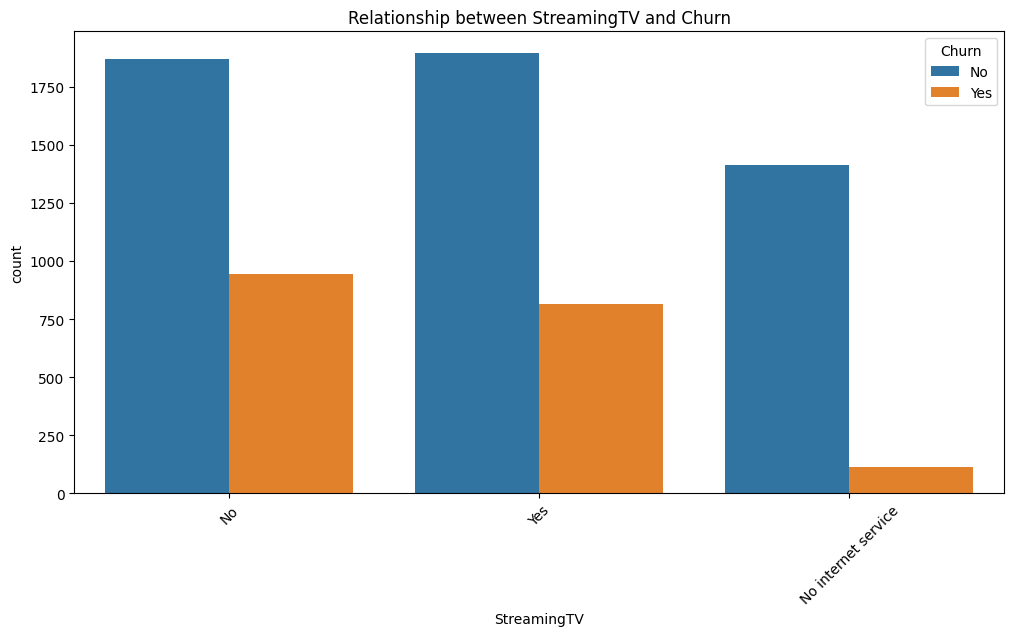

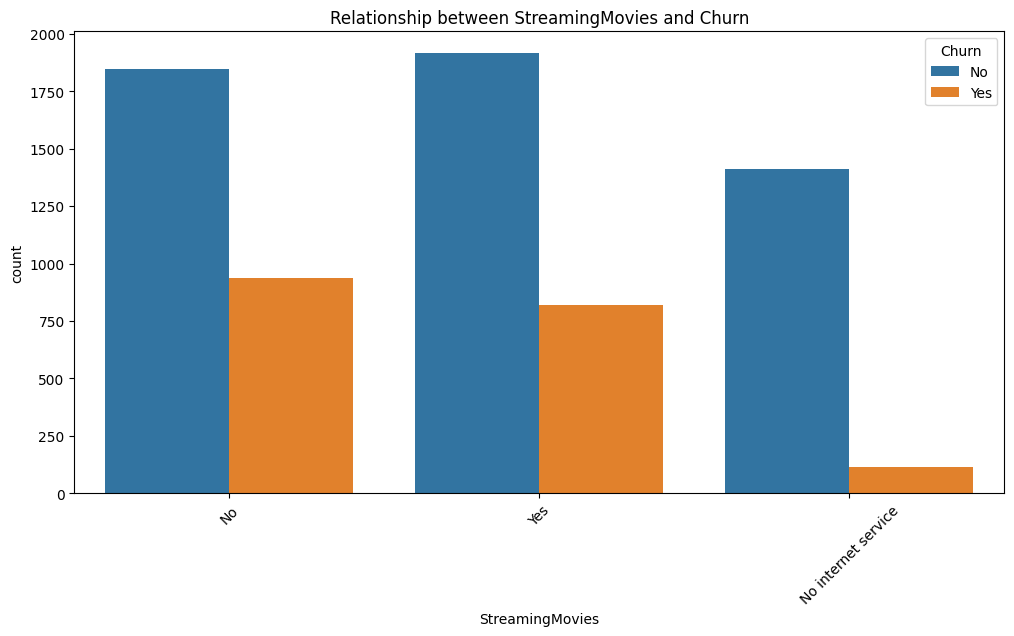

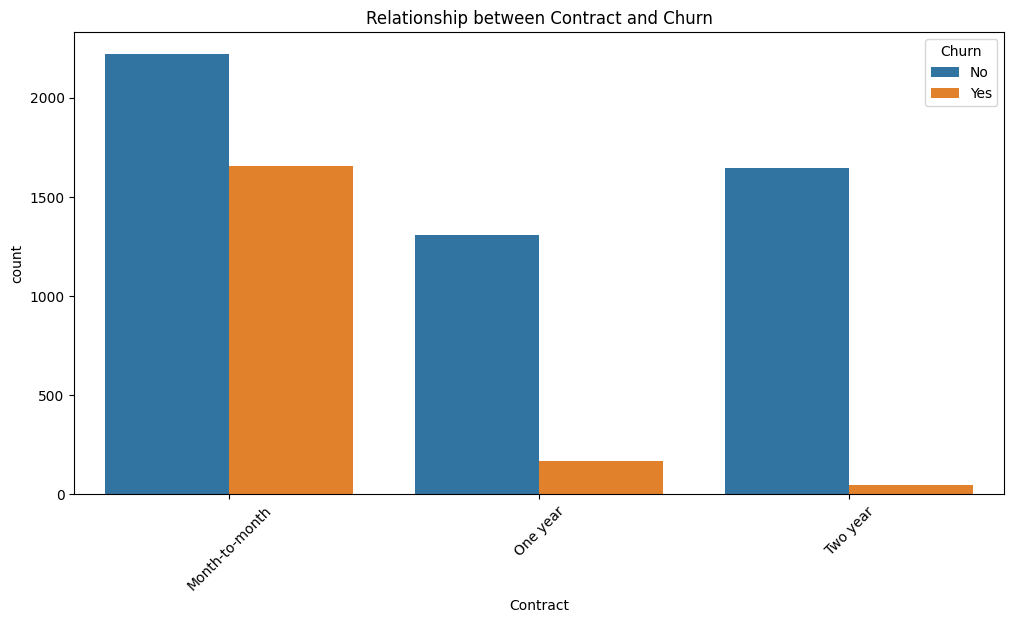

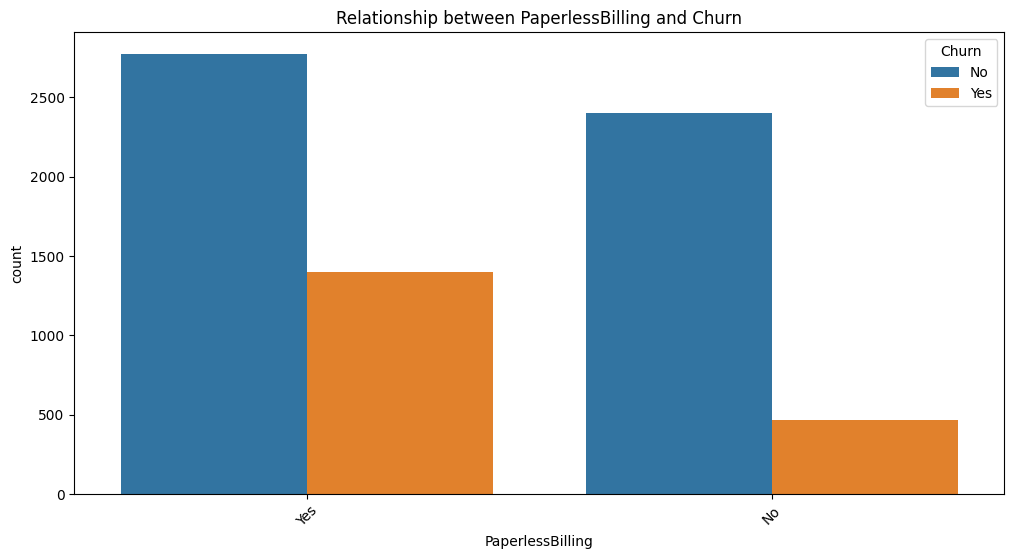

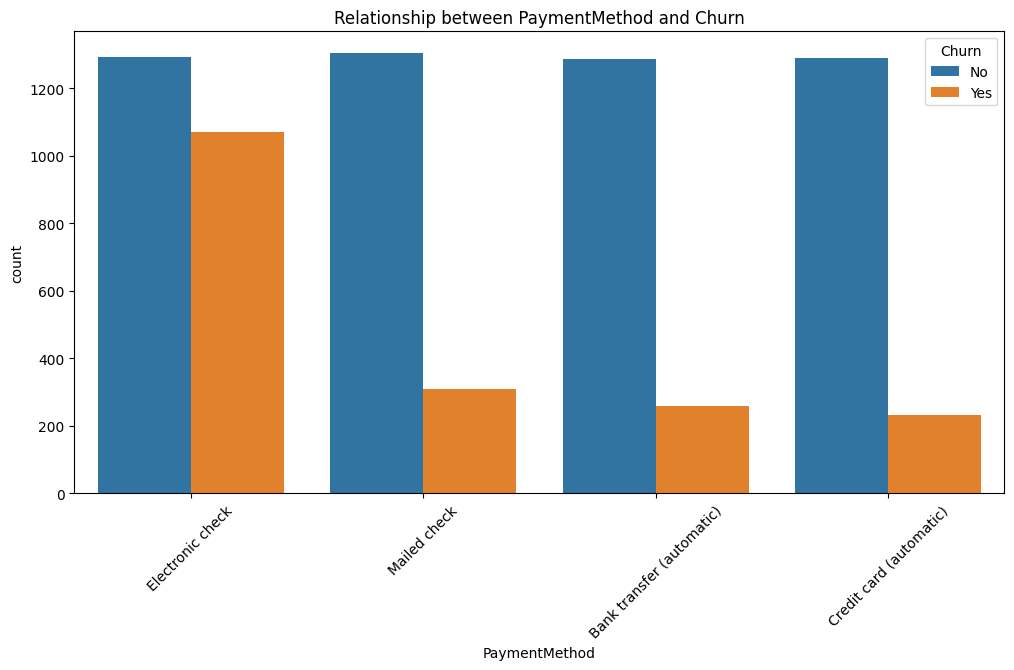

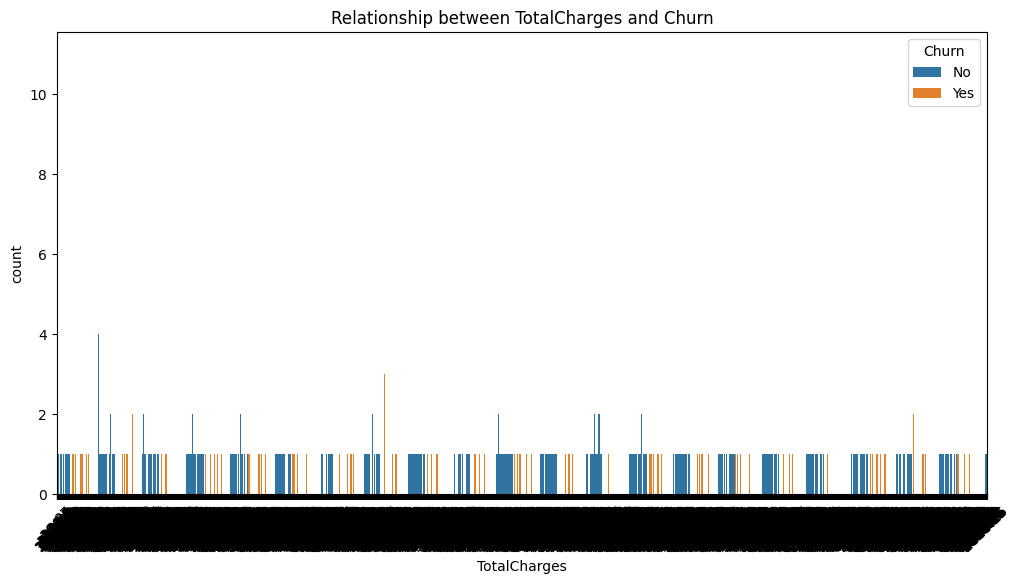

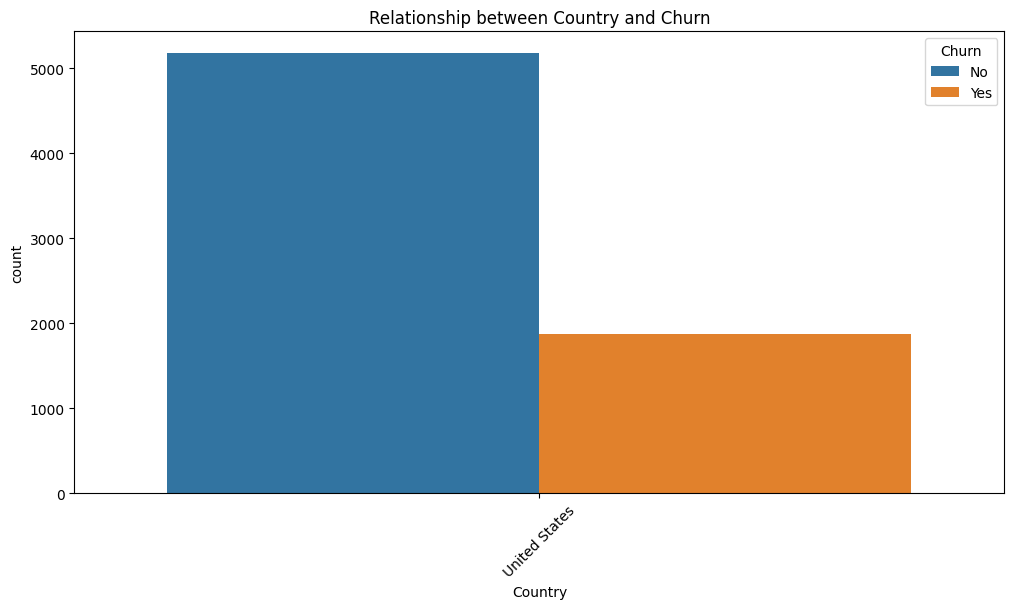

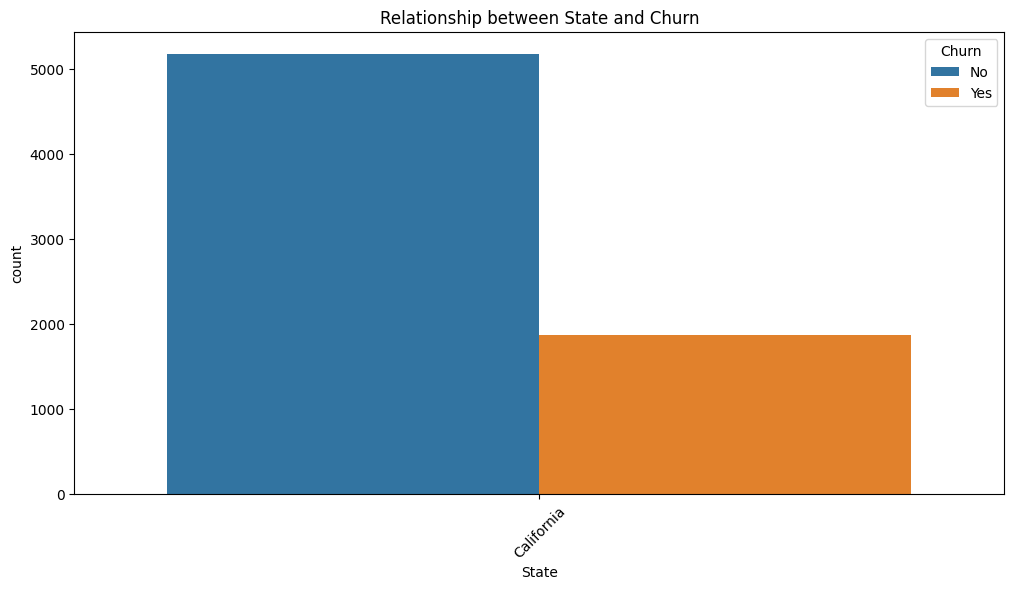

In [ ]:
# Visualizing the distribution of categorical features and their relationship with Churn

categorical_features = df.select_dtypes(include=['object']).drop(columns=['customerID', 'Churn','City', 'Lat Long', 'Population', 'Median Household Income', 'Housing Units'  ])  # Excluding customerID and Churn

for feature in categorical_features.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'Relationship between {feature} and Churn')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')
    plt.show()

<ipython-input-22-759abd273e5b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ], color="Red", shade = True)
<ipython-input-22-759abd273e5b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ], color="Blue", shade= True)


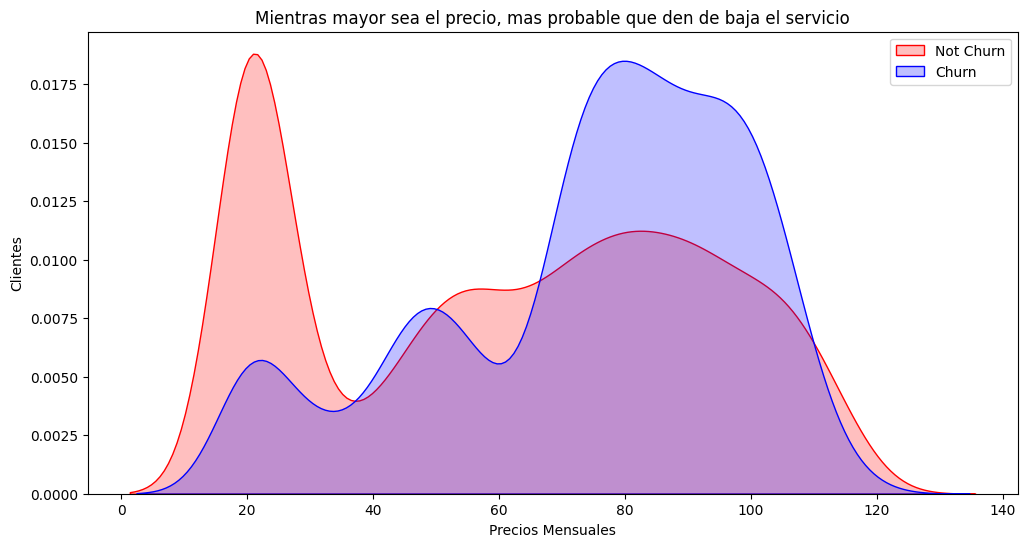

In [ ]:
# Visualizing the MonthlyCharges distribution for churned vs. retained customers
plt.figure(figsize=(12, 6))
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ], color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ], color="Blue", shade= True)
plt.legend(["Not Churn","Churn"], loc='upper right')
ax.set_ylabel('Clientes')
ax.set_xlabel('Precios Mensuales')
ax.set_title('Mientras mayor sea el precio, mas probable que den de baja el servicio')
plt.show()

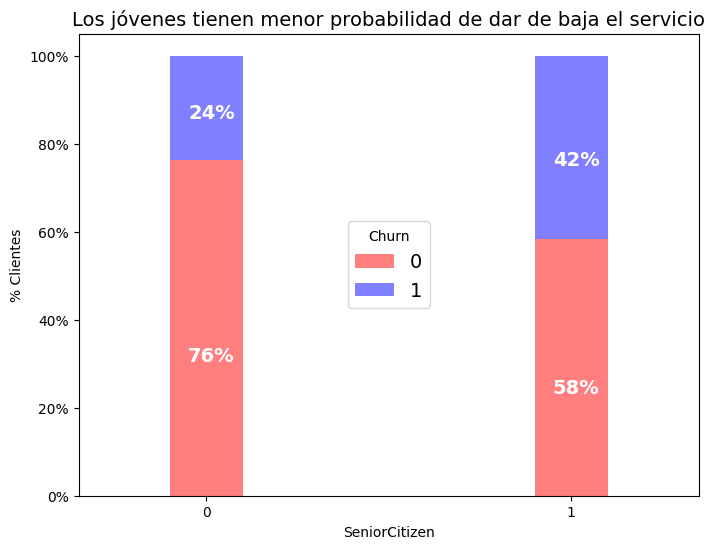

In [ ]:
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

colors_transparent = [(1, 0, 0, 0.5), (0, 0, 1, 0.5)]  # Colores con transparencia (RGBA)

ax = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                   width=0.2,
                                                                   stacked=True,
                                                                   rot=0,
                                                                   figsize=(8,6),
                                                                   color=colors_transparent)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center', prop={'size':14}, title='Churn')
ax.set_ylabel('% Clientes')
ax.set_title('Los jóvenes tienen menor probabilidad de dar de baja el servicio', size=14)

# Código para añadir las etiquetas de datos en el gráfico de barras apiladas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (x + 0.25*width, y + 0.4*height),
                color='white' if height > 20 else 'black',  # color del texto blanco para mejor contraste
                weight='bold',
                size=14)
plt.show()


<Figure size 800x600 with 0 Axes>

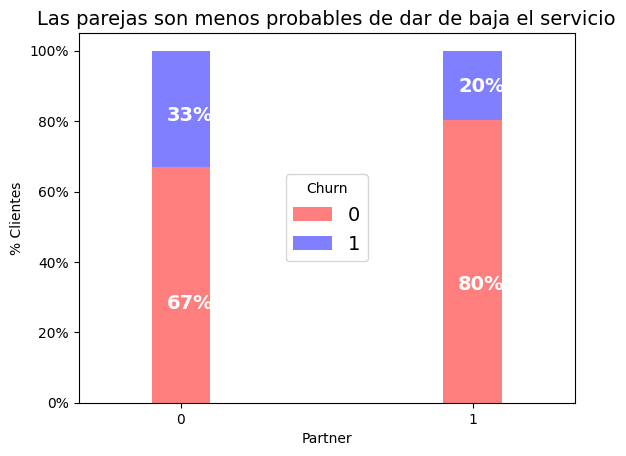

In [ ]:
# Para 'Partners'
partner_churn = df.groupby(['Partner','Churn']).size().unstack()

plt.figure(figsize=(8, 6))
colors_transparent = [(1, 0, 0, 0.5), (0, 0, 1, 0.5)]  # Rojo y Azul con transparencia
ax1 = (partner_churn.T * 100.0 / partner_churn.T.sum()).T.plot(kind='bar',
                                                                width=0.2,
                                                                stacked=True,
                                                                rot=0,
                                                                color=colors_transparent)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.legend(loc='center', prop={'size':14}, title='Churn')
ax1.set_ylabel('% Clientes')
ax1.set_title('Las parejas son menos probables de dar de baja el servicio', size=14)

# Añadiendo las etiquetas de datos en el gráfico de barras apiladas
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax1.annotate('{:.0f}%'.format(height), (x + 0.25*width, y + 0.4*height),
                color='white',
                weight='bold',
                size=14)
plt.show()


<Figure size 800x600 with 0 Axes>

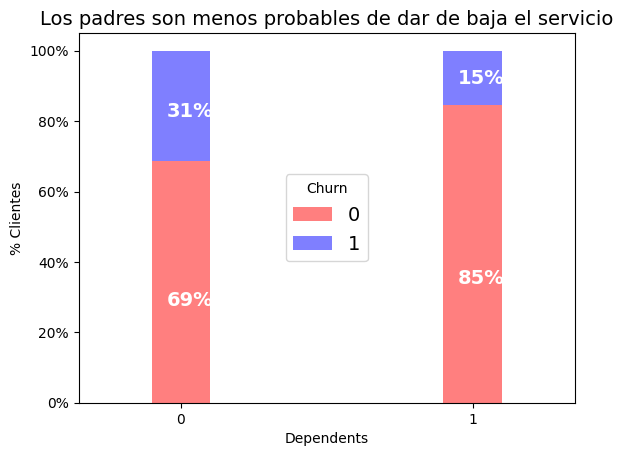

In [ ]:
# Para 'Dependents'
dependant_churn = df.groupby(['Dependents','Churn']).size().unstack()

plt.figure(figsize=(8, 6))
colors_transparent = [(1, 0, 0, 0.5), (0, 0, 1, 0.5)]  # Rojo y Azul con transparencia
ax2 = (dependant_churn.T * 100.0 / dependant_churn.T.sum()).T.plot(kind='bar',
                                                                    width=0.2,
                                                                    stacked=True,
                                                                    rot=0,
                                                                    color=colors_transparent)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(loc='center', prop={'size':14}, title='Churn')
ax2.set_ylabel('% Clientes')
ax2.set_title('Los padres son menos probables de dar de baja el servicio', size=14)

# Añadiendo las etiquetas de datos en el gráfico de barras apiladas
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax2.annotate('{:.0f}%'.format(height), (x + 0.25*width, y + 0.4*height),
                color='white',
                weight='bold',
                size=14)
plt.show()




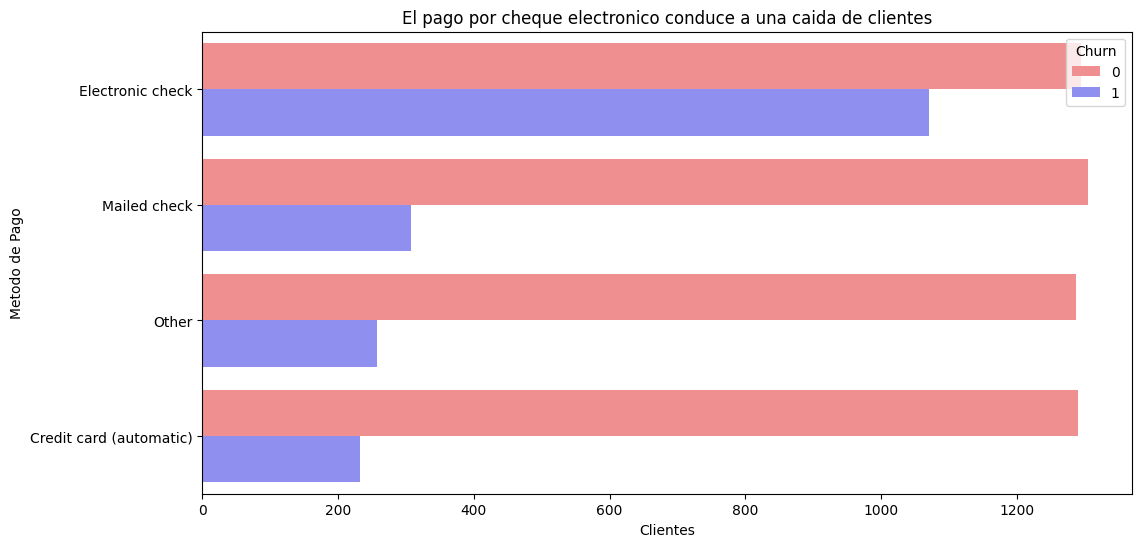

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertimos los colores hexadecimales a formato RGBA normalizado con transparencia alfa de 0.5 (50%)
color_blue_transparent = (127/255, 127/255, 255/255, 0.5)  # Azul #7F7FFF con transparencia
color_red_transparent = (255/255, 127/255, 127/255, 0.5)   # Rojo #FF7F7F con transparencia

# Creando la paleta de colores con transparencia
palette_with_transparency = [color_red_transparent, color_blue_transparent]


# Creamos una nueva columna 'PaymentMethod' para identificar el método de pago utilizado.
def label_payment_method(row):
    if row['PaymentMethod_Credit card (automatic)'] == 1:
        return 'Credit card (automatic)'
    elif row['PaymentMethod_Electronic check'] == 1:
        return 'Electronic check'
    elif row['PaymentMethod_Mailed check'] == 1:
        return 'Mailed check'
    return 'Other'

df['PaymentMethod'] = df.apply(label_payment_method, axis=1)

# Creando el gráfico de barras con la paleta de colores transparentes
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, y='PaymentMethod', hue='Churn', palette=palette_with_transparency)
plt.title('El pago por cheque electronico conduce a una caida de clientes')
plt.xlabel('Clientes')
plt.ylabel('Metodo de Pago')
plt.legend(title='Churn', loc='best')
plt.show()


<Figure size 1000x600 with 0 Axes>

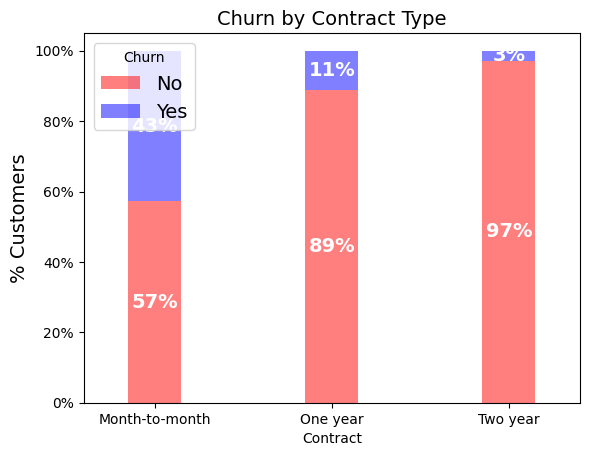

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import pandas as pd


# Calculamos el churn por tipo de contrato
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

# Definimos los colores con transparencia
colors_transparent = [(1, 0, 0, 0.5), (0, 0, 1, 0.5)]  # Rojo y Azul con transparencia

# Creamos la figura y los ejes
plt.figure(figsize=(10, 6))
ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                 width=0.3,
                                                                 stacked=True,
                                                                 rot=0,
                                                                 color=colors_transparent)
# Formateamos el eje y como porcentaje
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Configuramos leyendas, títulos y etiquetas
ax.legend(loc='best', prop={'size':14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Contract Type', size=14)

# Añadimos etiquetas de datos en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2),
                color='white',
                weight='bold',
                size=14,
                ha='center',  # Alineación horizontal centrada
                va='center')  # Alineación vertical centrada

# Mostramos el gráfico
plt.show()


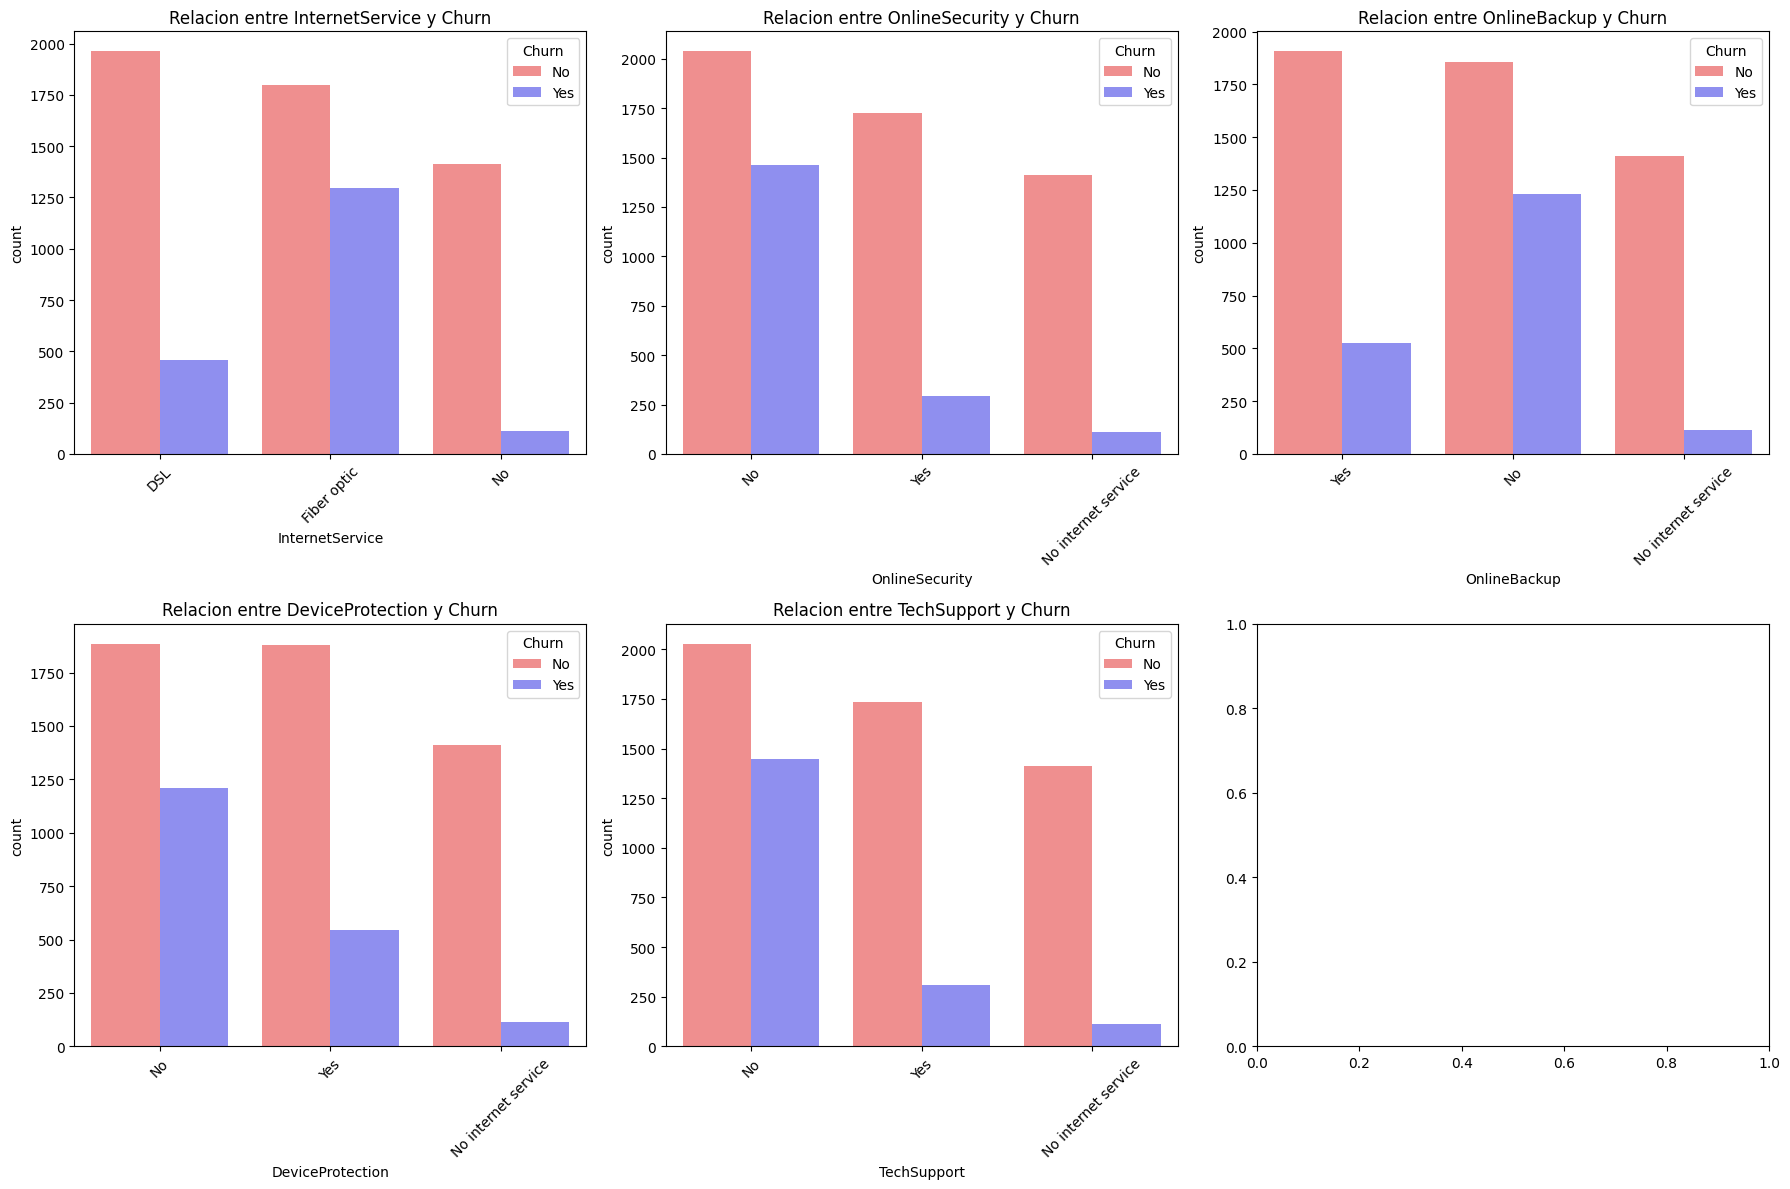

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertimos los colores hexadecimales a formato RGBA normalizado con transparencia alfa de 0.5 (50%)
color_blue_transparent = (127/255, 127/255, 255/255, 0.5)  # Azul #7F7FFF con transparencia
color_red_transparent = (255/255, 127/255, 127/255, 0.5)   # Rojo #FF7F7F con transparencia

# Creando la paleta de colores con transparencia
palette_with_transparency = [color_red_transparent, color_blue_transparent]

# Lista de variables categóricas de interés
categorical_features_of_interest = ['InternetService', 'OnlineSecurity',
                                    'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Crear una figura con subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Aplanar la matriz de ejes para facilitar la iteración
axes = axes.flatten()

# Crear un bucle para generar los gráficos de barras apiladas para las variables categóricas
for i, feature in enumerate(categorical_features_of_interest):
    # Utilizar el método countplot de seaborn en el eje actual
    sns.countplot(data=df, x=feature, hue='Churn', palette=palette_with_transparency, ax=axes[i])

    # Personalizar el título del gráfico
    axes[i].set_title(f'Relacion entre {feature} y Churn')

    # Rotar las etiquetas del eje x para una mejor visualización
    axes[i].tick_params(axis='x', rotation=45)

    # Personalizar la leyenda
    axes[i].legend(title='Churn', loc='upper right')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura con todos los gráficos
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Binary Encoding
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for feature in binary_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

# 2. One-Hot Encoding
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                 'Contract', 'PaymentMethod'], drop_first=True)

# 3. Scaling Numerical Features
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 4. Dropping the 'customerID' column as it's just an identifier and won't help in prediction
df = df.drop(columns=['customerID'])

# Display the transformed dataframe
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,...,0,0,0,0,0,0,0,0,1,0


# **Modelos de Machine**

El modelo de regresión utilizado para predecir el churn de clientes demostró una buena precisión general del 82.11%. Exhibió una mejor capacidad para identificar a los clientes que no abandonarán el servicio, con un alto recall de 90% en esa clase. Aunque la precisión para los clientes que se van es más baja, con un 69%, para señalar factores críticos que pueden influir en la decisión de un cliente de irse. La matriz de confusión indica que el modelo es más propenso a predecir falsos negativos que falsos positivos, lo cual es preferible en escenarios donde el costo de perder un cliente es alto

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into training and testing sets (80% train, 20% test)
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Initialize and train the logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predictions on the test set
y_pred = lr.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(accuracy, classification_rep, confusion_mat)

# Generar la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()


ValueError: ignored

El modelo anterior para ser más preciso que el modelo de Random Forest.
El modelo de Random Forest no solo es más complejo que la regresión logistica, sino que es más díficil que interpretar y el tiempo de entrenamiento y predicción es mucho mayor.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7998580553584103
